# CKY parser with constituent copying

This parser was written by Floris. It implements copying by marking every rule as a copy rule or a non-copy rule. Rules are in Chomsky Normal Form. Copy rules apply only if both daughters generate the same string.

In [92]:
import cky_constituent_copy as ckypy
from cky import grammar2string
from IPython.display import Image
from IPython.display import display

We make a toy grammar. None of these rules are copy rules.

In [93]:
grammar_bare = [("S",  [(["NP","VP"])]),
               ("VP", [(["VP","PP"]),
                       (["V","NP"]),
                       (["eats"])]),
               ("PP", [(["P","NP"])]),
               ("NP", [(["NP","PP"]),
                       (["Det","N"]),
                       (["she"])]),
               ("V" , [(["eats"])]),
               ("P" , [(["with"])]),
               ("N" , [(["fish"]),
                       (["fork"])]),
               ("Det",[(["a"])])]

In [94]:
print(grammar2string(grammar_bare))

S->NP.VP
VP->VP.PP
VP->V.NP
VP->eats
PP->P.NP
NP->NP.PP
NP->Det.N
NP->she
V->eats
P->with
N->fish
N->fork
Det->a



In [95]:
def mark_no_copy_rules(grammar):
    """ Takes a 'simple' grammar where each rule is not marked as being a copy rule or not,
    and returns the same grammar but with an extra field that marks that this rule is not a copy rule (False)
    """
    return [ (lhs,[ (r,False) for r in rhs ]) for (lhs,rhs) in grammar ]

In [96]:
mark_no_copy_rules(grammar_bare)

[('S', [(['NP', 'VP'], False)]),
 ('VP', [(['VP', 'PP'], False), (['V', 'NP'], False), (['eats'], False)]),
 ('PP', [(['P', 'NP'], False)]),
 ('NP', [(['NP', 'PP'], False), (['Det', 'N'], False), (['she'], False)]),
 ('V', [(['eats'], False)]),
 ('P', [(['with'], False)]),
 ('N', [(['fish'], False), (['fork'], False)]),
 ('Det', [(['a'], False)])]

In [97]:
grammar_copy = mark_no_copy_rules(grammar_bare)

A second grammar that generates full binary trees

In [98]:
grammar_ambig = [("S",[(["S","S"],False),(["a"],False)])]
grammar_ambig_probs = [("S",[(["S","S"],False,0.5),(["a"],False,0.5)])]

A third grammar with copying

In [99]:
grammar_ambig_copy = [("S",[(["S","S"],False),(["S","S"],True),(["a"],False)])]
grammar_ambig_copy_probs = [("S",[(["S","S"],False,0.3),(["S","S"],True,0.3),(["a"],False,0.4)])]

## Let's run some examples

In [100]:
s = "she eats a fish with a fork".split(" ")

In [101]:
g = grammar_copy

Parse s with g

In [102]:
chart,backpointers = ckypy.parse(s,g)

In [103]:
ckypy.print_chart(chart)

### Chart ###
(0,1) ['NP']
(0,2) ['S']
(0,4) ['S']
(0,7) ['S']
(1,2) ['VP', 'V']
(1,4) ['VP']
(1,7) ['VP']
(2,3) ['Det']
(2,4) ['NP']
(2,7) ['NP']
(3,4) ['N']
(4,5) ['P']
(4,7) ['PP']
(5,6) ['Det']
(5,7) ['NP']
(6,7) ['N']
### end Chart ###


In [104]:
ckypy.print_backpointers(backpointers)

### Backpointers ###
(0,2) [[(1, 'NP', 'VP', False)], [], [], [], [], [], [], []]
(0,4) [[(1, 'NP', 'VP', False)], [], [], [], [], [], [], []]
(0,7) [[(1, 'NP', 'VP', False)], [], [], [], [], [], [], []]
(1,4) [[], [(2, 'V', 'NP', False)], [], [], [], [], [], []]
(1,7) [[], [(2, 'V', 'NP', False), (4, 'VP', 'PP', False)], [], [], [], [], [], []]
(2,4) [[], [], [], [(3, 'Det', 'N', False)], [], [], [], []]
(2,7) [[], [], [], [(4, 'NP', 'PP', False)], [], [], [], []]
(4,7) [[], [], [(5, 'P', 'NP', False)], [], [], [], [], []]
(5,7) [[], [], [], [(6, 'Det', 'N', False)], [], [], [], []]
### end Backpointers ###


Collect the trees

In [105]:
parses = ckypy.collect_trees(0,len(s),"S",chart,backpointers,g,s)

Print the trees to files

In [106]:
for i,parse in enumerate(parses):    
    ckypy.tree_to_png(parse,"parse_%i.png"%i)

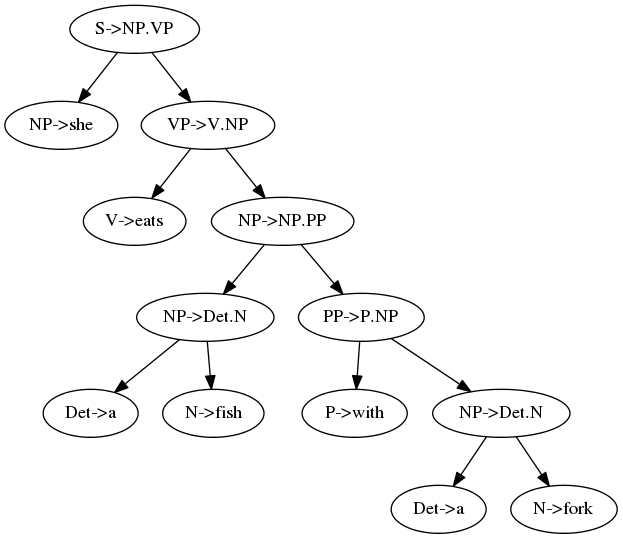

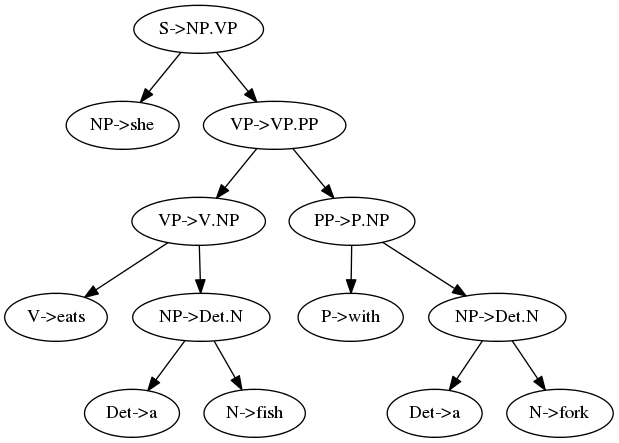

In [107]:
x=Image(filename='parse_0.png')
y=Image(filename='parse_1.png')
display(x,y)

Count the trees

In [108]:
ckypy.n_parses("S",chart,backpointers,g,s)

2

Calculate probabilities

In [109]:
grammar_copy_probs = [("S",  [(["NP","VP"],False,1.)]),
           ("VP", [(["VP","PP"],False,0.25),
                   (["V","NP"],False,0.5),
                   (["eats"],False,0.25)]),
           ("PP", [(["P","NP"],False,1.)]),
           ("NP", [(["NP","PP"],False,0.3),
                   (["Det","N"],False,0.4),
                   (["she"],False,0.3)]),
           ("V" , [(["eats"],False,1.)]),
           ("P" , [(["with"],False,1.)]),
           ("N" , [(["fish"],False,0.4),
                   (["fork"],False,0.6)]),
           ("Det",[(["a"],False,1.)])]

In [110]:
g_probs = ckypy.make_rule_probs(grammar_copy_probs)

In [111]:
(probs,s_prob)=ckypy.probability("S",chart,backpointers,g,s,g_probs)

The log probability of the sentence is the second element

In [112]:
s_prob

-5.7546548050299569

Let's un-log it just to get a look

In [113]:
ckypy.np.exp(s_prob)

0.0031680000000000024

## Full binary tree grammars

### Using the binary tree grammar without copying

In [114]:
g = grammar_ambig

In [115]:
s = ["a"]*3

In [116]:
chart,backpointers = ckypy.parse(s,g)

In [117]:
ckypy.print_chart(chart)

### Chart ###
(0,1) ['S']
(0,2) ['S']
(0,3) ['S']
(1,2) ['S']
(1,3) ['S']
(2,3) ['S']
### end Chart ###


In [118]:
ckypy.print_backpointers(backpointers)

### Backpointers ###
(0,2) [[(1, 'S', 'S', False)]]
(0,3) [[(1, 'S', 'S', False), (2, 'S', 'S', False)]]
(1,3) [[(2, 'S', 'S', False)]]
### end Backpointers ###


In [119]:
ckypy.n_parses("S",chart,backpointers,g,s)

2

In [120]:
parses = ckypy.collect_trees(0,len(s),"S",chart,backpointers,g,s)

In [121]:
for i,parse in enumerate(parses):    
    ckypy.tree_to_png(parse,"parse_%i.png"%i)

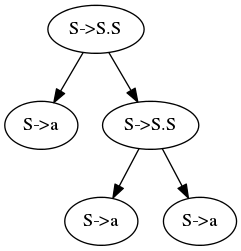

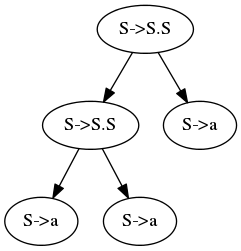

In [122]:
x=Image(filename='parse_0.png')
y=Image(filename='parse_1.png')
display(x,y)

Probability of sentence

In [123]:
g_probs = ckypy.make_rule_probs(grammar_ambig_probs)

In [124]:
(probs,s_prob)=ckypy.probability("S",chart,backpointers,g,s,g_probs)

The log probability of the sentence is the second element

In [125]:
s_prob

-2.7725887222397811

Let's un-log it just to get a look

In [126]:
ckypy.np.exp(s_prob)

0.0625

### Using the binary tree grammar with copying

In [127]:
g = grammar_ambig_copy

In [128]:
s = ["a"]*3

In [129]:
chart,backpointers = ckypy.parse(s,g)

In [130]:
ckypy.print_chart(chart)

### Chart ###
(0,1) ['S']
(0,2) ['S']
(0,3) ['S']
(1,2) ['S']
(1,3) ['S']
(2,3) ['S']
### end Chart ###


In [131]:
ckypy.print_backpointers(backpointers)

### Backpointers ###
(0,2) [[(1, 'S', 'S', False), (1, 'S', 'S', True)]]
(0,3) [[(1, 'S', 'S', False), (2, 'S', 'S', False)]]
(1,3) [[(2, 'S', 'S', False), (2, 'S', 'S', True)]]
### end Backpointers ###


In [132]:
ckypy.n_parses("S",chart,backpointers,g,s)

4

In [133]:
parses = ckypy.collect_trees(0,len(s),"S",chart,backpointers,g,s)

In [134]:
for i,parse in enumerate(parses):    
    ckypy.tree_to_png(parse,"parse_%i.png"%i)

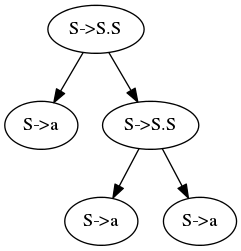

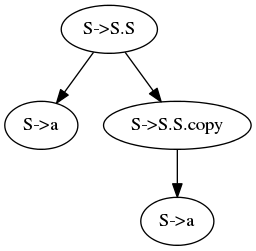

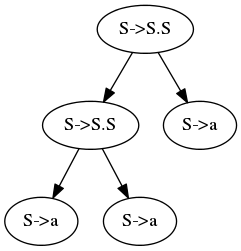

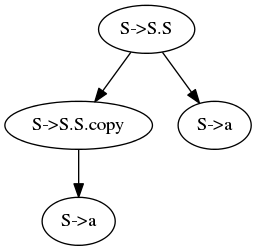

In [135]:
x=Image(filename='parse_0.png')
y=Image(filename='parse_1.png')
z=Image(filename='parse_2.png')
w=Image(filename='parse_3.png')


display(x,y,z,w)

Probability of sentence

In [136]:
g_probs = ckypy.make_rule_probs(grammar_ambig_copy_probs)

In [137]:
(probs,s_prob)=ckypy.probability("S",chart,backpointers,g,s,g_probs)

The log probability of the sentence is the second element

In [138]:
s_prob

-3.2109076552190237

Let's un-log it just to get a look

In [139]:
ckypy.np.exp(s_prob)

0.040320000000000009